# UT Weather Data Inspection
The purpose of this notebook is to simply visualize the weather data from UT's campus station so we have an idea of the types of variables at our disposal. 

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

# Data Import
The historic weather data are stored in the ```/data/external/``` directory within this project.

In [22]:
weatherRaw = pd.read_csv('../data/external/ut_weather/UTPD Wx Station 5 min data/utweather_5min_12192018-06032020.csv',
                        parse_dates={'datetime':[0,1]})
weatherRaw.set_index('datetime',inplace=True)
for column in weatherRaw.columns:
    weatherRaw[column] = pd.to_numeric(weatherRaw[column],errors='coerce')

/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,6,12,13,14,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Visualizing
Here we look at weather data during the periods we are interested in.

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

We will look at the historic data we have starting from November 1 - the approximate date that our sensor network was up and running. 

In [23]:
# resampling for our time frame
weather15Min = weatherRaw.resample('15T').mean()
weatherRestricted = weather15Min[datetime(2019,11,1):datetime(2020,6,1)]
weatherRestricted.columns

Index(['Out Temp', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt', 'Wind Speed',
       'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill',
       'Heat Index', 'THW Index', 'Bar  ', 'Rain', 'Rain Rate', 'Heat D-D',
       'Cool D-D', 'In Temp', 'In Hum', 'In Dew', 'In Heat', 'In EMC',
       'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS Recep', 'Arc. Int.'],
      dtype='object')

## Temperature

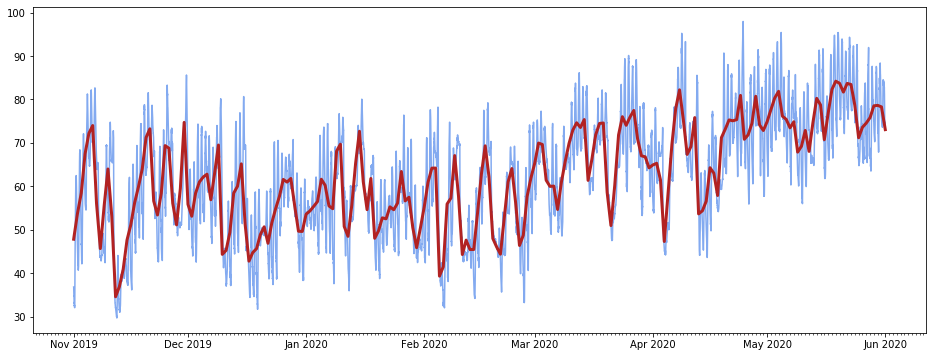

In [31]:
fig, ax = plt.subplots(figsize=(16,6))
weatherDaily = weatherRestricted.resample('1d').mean()
ax.plot(weatherRestricted.index,weatherRestricted['Out Temp'],color='cornflowerblue',alpha=0.8)
ax.plot(weatherDaily.index,weatherDaily['Out Temp'],linewidth=3,color='firebrick')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.show()
plt.close()

## Humidity

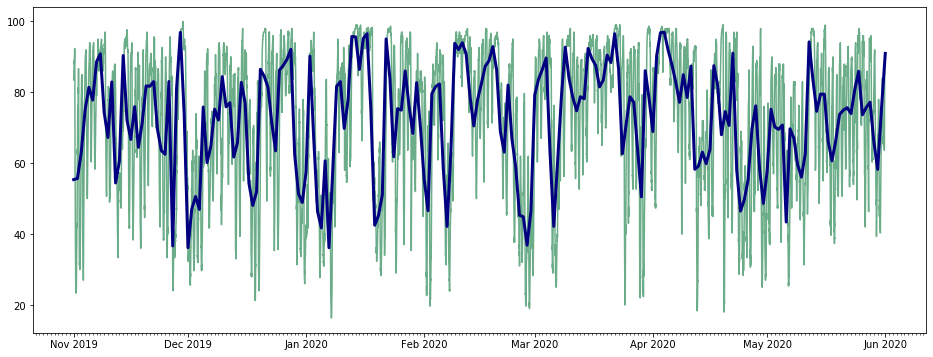

In [34]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(weatherRestricted.index,weatherRestricted['Out Hum'],color='seagreen',alpha=0.7)
ax.plot(weatherDaily.index,weatherDaily['Out Hum'],linewidth=3,color='navy')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.show()
plt.close()